In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

### Setting Up Primitives and Functions for Demonstrating Convex Hull algorithms

Generating X and Y Coordinates

In [2]:
num_points = 10

rng = np.random.default_rng()

x = rng.integers(0, 50, size=num_points)
y = rng.integers(0, 50, size=num_points)

x,y

(array([12,  8, 10, 22,  5,  5,  7, 41, 31, 36]),
 array([20, 18,  1, 36, 16, 33, 21, 46, 12, 28]))

In [3]:
points = np.column_stack((x, y))
points = np.sort(points, axis=0)
points

array([[ 5,  1],
       [ 5, 12],
       [ 7, 16],
       [ 8, 18],
       [10, 20],
       [12, 21],
       [22, 28],
       [31, 33],
       [36, 36],
       [41, 46]])

<Axes: >

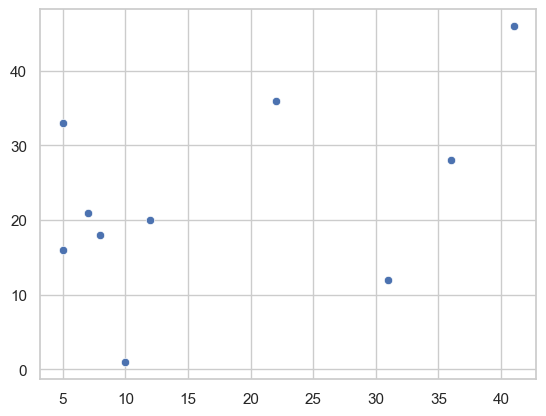

In [4]:
sns.scatterplot(x=x, y=y)

Defining a get_orientation function

In [5]:
def get_orientation(p1, p2, p3):
    # p1, p2, p3 are arrays of shape (2,)
    val = (p2[0] - p1[0]) * (p3[1] - p1[1]) - (p2[1] - p1[1]) * (p3[0] - p1[0])
    if np.isclose(val, 0): return (0, 'collinear')  # Collinear
    return (1, 'ccw') if val > 0 else (2, 'cw')      # 1: CCW, 2: CW

In [6]:
points[0][0], points[0][1]

(np.int64(5), np.int64(1))

Demonstration of functioning get_orientation method

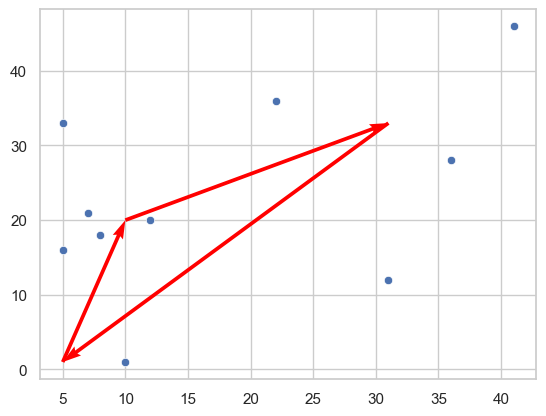

In [7]:
sns.scatterplot(x=x, y=y)

hull_points = [0,4,7]
x = points[hull_points, 0]
y = points[hull_points, 1]

# Calculate vectors (u, v) pointing to the next point
# np.roll shifts the array so we subtract point[i] from point[i+1]
u = np.roll(x, -1) - x
v = np.roll(y, -1) - y

# angles='xy', scale_units='xy', and scale=1 make the arrows 
# exactly as long as the distance between points
plt.quiver(x, y, u, v, color='red', angles='xy', scale_units='xy', scale=1)

In [8]:
val = get_orientation(points[0], points[4], points[7])
val[1]

'cw'

# Algorithm 1: Slow, Naive

In [9]:
hull_points = []

# Selecting the leftmost point. At 0 index after sorting.
current = points[0]

available_points = points[1:].copy()

hull_points.append(current)

for p in available_points:
    for q in available_points:
        if p is q:
            continue
        
        valid = True
        
        for r in available_points:
            if r is p or r is q:
                continue
            if get_orientation(p, q, r)[1] == 'ccw':
                valid = False
            else:
                valid = True
                print(f"Appending p: {p}, q: {q}")
                hull_points.append([p, q])
                available_points.remove(p)
                available_points.remove(q)
                
                
    
    

Appending p: [ 5 12], q: [ 5 12]


AttributeError: 'numpy.ndarray' object has no attribute 'remove'